In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import tensorflow as tf

In [102]:
tf.__version__

'2.12.0'

In [104]:
data=pd.read_csv("dataset\heart\heart_dataset.csv")
data.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [4]:
data2=pd.read_csv("dataset\heart\heart_dataset.csv")

In [5]:
data.drop(["Unnamed: 0"],inplace=True,axis=1)

In [6]:
data2.drop(["Unnamed: 0"],inplace=True,axis=1)

In [7]:
set(data.target)

{'no', 'yes'}

In [8]:
def sex(x):
    if x=="female":
        return 0
    else:
        return 1

def target(x):
    if x=="no":
        return 0
    else:
        return 1

In [9]:
data.sex=data.sex.apply(lambda x:sex(x))
data.target=data.target.apply(lambda x:target(x))

In [10]:
data2.sex=data2.sex.apply(lambda x:sex(x))
data2.target=data2.target.apply(lambda x:target(x))

In [11]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0


C:\Users\Armaan\AppData\Local\Temp\ipykernel_5476\2786958822.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x])


<Axes: xlabel='oldpeak', ylabel='Density'>

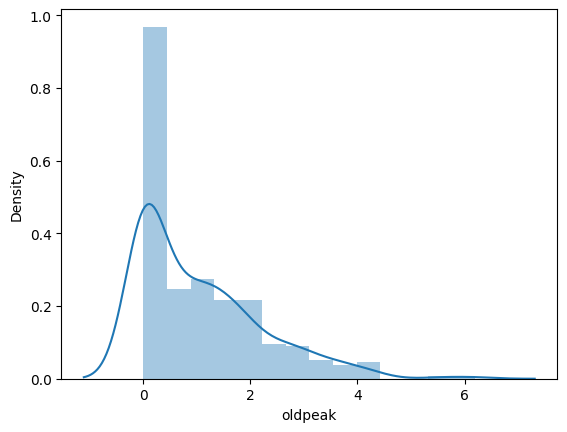

In [339]:
x="oldpeak"
sns.distplot(data[x])

In [12]:
sns.boxplot(data[x])

NameError: name 'x' is not defined

In [341]:
p25=data[x].quantile(0.25)
p75=data[x].quantile(0.75)
p25,p75

(0.0, 1.6)

In [342]:
iqr=p75-p25
uprlmt=p75+1.5*iqr
lwrlmt=p25-1.5*iqr
uprlmt,lwrlmt

(4.0, -2.4000000000000004)

In [343]:
data[data[x]>uprlmt]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,170.0,270.0,0,0,145.0,0,4.2,0,0,3,1
204,62,0,0,160.0,164.0,0,0,145.0,0,6.2,0,3,3,0
221,55,1,0,140.0,217.0,0,1,111.0,1,5.6,0,0,3,0
250,51,1,0,140.0,298.0,0,1,122.0,1,4.2,1,3,3,0
291,58,1,0,114.0,318.0,0,2,140.0,0,4.4,0,3,1,0


In [344]:
data[data[x]<lwrlmt]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [345]:
data[x]=np.where(data[x]>uprlmt,uprlmt,np.where(data[x]<lwrlmt,lwrlmt,data[x]))

<Axes: >

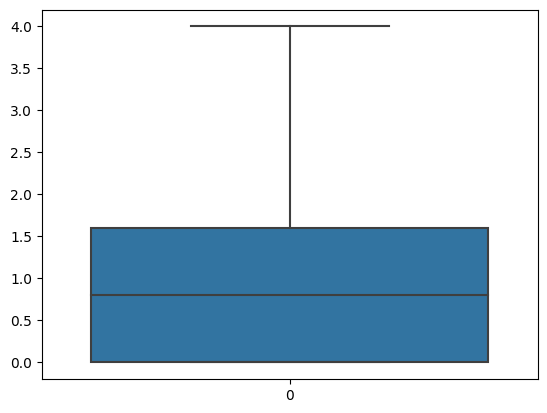

In [346]:
sns.boxplot(data[x])

In [13]:
sns.distplot(data[x])

NameError: name 'x' is not defined

In [14]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
data.trestbps.describe()
data.trestbps=data.trestbps.apply(lambda x:(x-94)/(170-94))

In [16]:
data.chol.describe()
data.chol=data.chol.apply(lambda x:(x-126)/(370.375-126))

In [17]:
data.age=data.age.apply(lambda x:x/100)

In [18]:
data.thalach.describe()
data.thalach=data.thalach.apply(lambda x:(x-87.25)/(202-87.25))

In [19]:
data.oldpeak.describe()
data.oldpeak=data.oldpeak.apply(lambda x:x/4)

In [20]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.63,1,3,0.671053,0.437852,1,0,0.546841,0,0.575,0,0,1,1
1,0.37,1,2,0.473684,0.507417,0,1,0.869281,0,0.875,0,0,2,1
2,0.41,0,1,0.473684,0.319182,0,0,0.738562,0,0.350,2,0,2,1
3,0.56,1,1,0.342105,0.450128,0,1,0.790850,0,0.200,2,0,2,1
4,0.57,0,0,NaN,0.932992,0,1,0.660131,1,0.150,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.57,0,0,0.605263,0.470588,0,1,0.311547,1,0.050,1,0,3,0
299,0.45,1,3,0.210526,0.564706,0,1,0.389978,0,0.300,1,0,3,0
300,0.68,1,0,0.657895,0.274169,1,1,0.468410,0,0.850,1,2,3,0
301,0.57,1,0,NaN,0.020460,0,1,0.241830,1,0.300,1,1,3,0


In [21]:
data.age.mode()

0    0.58
Name: age, dtype: float64

In [22]:
data.chol.mode().mean()

0.35055413469735724

In [24]:
data.chol.fillna(data.chol.mode().mean(),inplace=True)
data.trestbps.fillna(data.trestbps.mode().mean(),inplace=True)
data.thalach.fillna(data.thalach.mode().mean(),inplace=True)

In [23]:
data2.chol.fillna(data2.chol.mode().mean(),inplace=True)
data2.trestbps.fillna(data2.trestbps.mode().mean(),inplace=True)
data2.thalach.fillna(data2.thalach.mode().mean(),inplace=True)

In [25]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.543663,0.683168,0.966997,0.494181,0.491881,0.148515,0.528053,0.547416,0.326733,0.259901,1.399340,0.729373,2.313531,0.544554
std,0.090821,0.466011,1.032052,0.231092,0.212217,0.356198,0.525860,0.195465,0.469794,0.290269,0.616226,1.022606,0.612277,0.498835
min,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.141612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475000,0.000000,0.000000,0.342105,0.347826,0.000000,0.000000,0.424837,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.550000,1.000000,1.000000,0.473684,0.466496,0.000000,1.000000,0.572985,0.000000,0.200000,1.000000,0.000000,2.000000,1.000000
75%,0.610000,1.000000,2.000000,0.605263,0.607673,0.000000,1.000000,0.686275,1.000000,0.400000,2.000000,1.000000,3.000000,1.000000
max,0.770000,1.000000,3.000000,1.394737,1.792327,1.000000,2.000000,1.000000,1.000000,1.550000,2.000000,4.000000,3.000000,1.000000


In [27]:
x=data2.drop(["target"],axis=1)
y=data2["target"]

In [28]:
x=data.drop(["target"],axis=1)
y=data["target"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [96]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[13],dtype=tf.float32),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(48,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.005),loss=tf.losses.binary_crossentropy,metrics=["accuracy"])

In [97]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
8/8 [==============================] - 1s 2ms/step - loss: 0.7194 - accuracy: 0.3789
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.4361
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.4229
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4405
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4802
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5991
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.6872
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.6916
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.7269
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.7357
Epoch 11/500
8/8 [===========

In [98]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8553


[0.387194961309433, 0.8552631735801697]

In [100]:
model.save("heartModel.h5")

In [538]:
y_pred=model.predict(x)

10/10 [==============================] - 0s 1ms/step


In [539]:
ypred=y_pred.round()

In [540]:
print(confusion_matrix(y,ypred))

[[134   4]
 [  5 160]]
